<a href="https://colab.research.google.com/github/m677s345/EECS731_MS_Project1/blob/master/EECS731_Project2_oleBill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cookiecutter
!cookiecutter https://github.com/drivendata/cookiecutter-data-science


     |████████████████████████████████| 51kB 4.3MB/s 
project_name [project_name]: EECS731_Project2_oleBill
repo_name [eecs731_project2_olebill]: EECS731_Project2_oleBill
author_name [Your name (or your organization/company/team)]: Matt Stalcup
description [A short description of the project.]: 
Select open_source_license:
1 - MIT
2 - BSD-3-Clause
3 - No license file
Choose from 1, 2, 3 [1]: 
s3_bucket [[OPTIONAL] your-bucket-for-syncing-data (do not include 's3://')]: 
aws_profile [default]: 
Select python_interpreter:
1 - python3
2 - python
Choose from 1, 2 [1]: 


The first step is to split the data into training and testing then do some data visualization on the dataset to see if there is any trends we can link before we begin. Below we see that we can see what actors are present in a play by comparing their names to the play names. I.E Hamlet is in Hamlet. This will allow us to sort the players into plays.


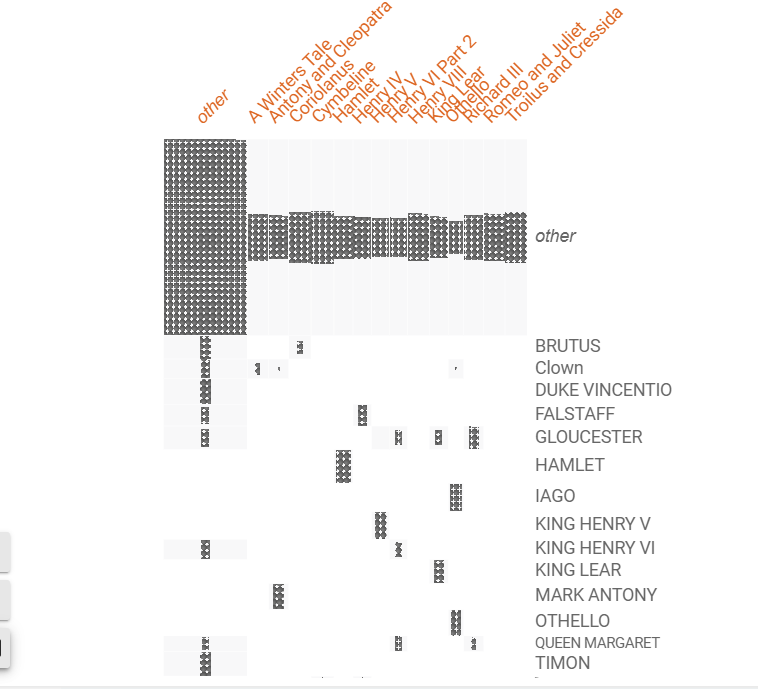

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('/content/EECS731_Project2_oleBill/data/raw/Shakespeare_data.csv',index_col=0, header=0 )#reads data from Shakespears plays fills in missing data with NaN
plays_df = data[pd.notna(data['ActSceneLine'])]                                                       #Ridding the dataset of scene information like what caracters come and go
plays_df[['Act','Scene','Line']] = plays_df['ActSceneLine'].str.split('.',expand= True).astype(float)     #Splits apart the act scene and line into different dataframe column
plays_df = plays_df.drop('ActSceneLine',axis=1)                                                           #drops the actseneline column because we have just split it up 
plays_df

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Play,PlayerLinenumber,Player,PlayerLine,Act,Scene,Line
Dataline,,,,,,,
4,Henry IV,1.0,KING HENRY IV,"So shaken as we are, so wan with care,",1.0,1.0,1.0
5,Henry IV,1.0,KING HENRY IV,"Find we a time for frighted peace to pant,",1.0,1.0,2.0
6,Henry IV,1.0,KING HENRY IV,And breathe short-winded accents of new broils,1.0,1.0,3.0
7,Henry IV,1.0,KING HENRY IV,To be commenced in strands afar remote.,1.0,1.0,4.0
8,Henry IV,1.0,KING HENRY IV,No more the thirsty entrance of this soil,1.0,1.0,5.0
...,...,...,...,...,...,...,...
111391,A Winters Tale,38.0,LEONTES,"Is troth-plight to your daughter. Good Paulina,",5.0,3.0,179.0
111392,A Winters Tale,38.0,LEONTES,"Lead us from hence, where we may leisurely",5.0,3.0,180.0
111393,A Winters Tale,38.0,LEONTES,Each one demand an answer to his part,5.0,3.0,181.0


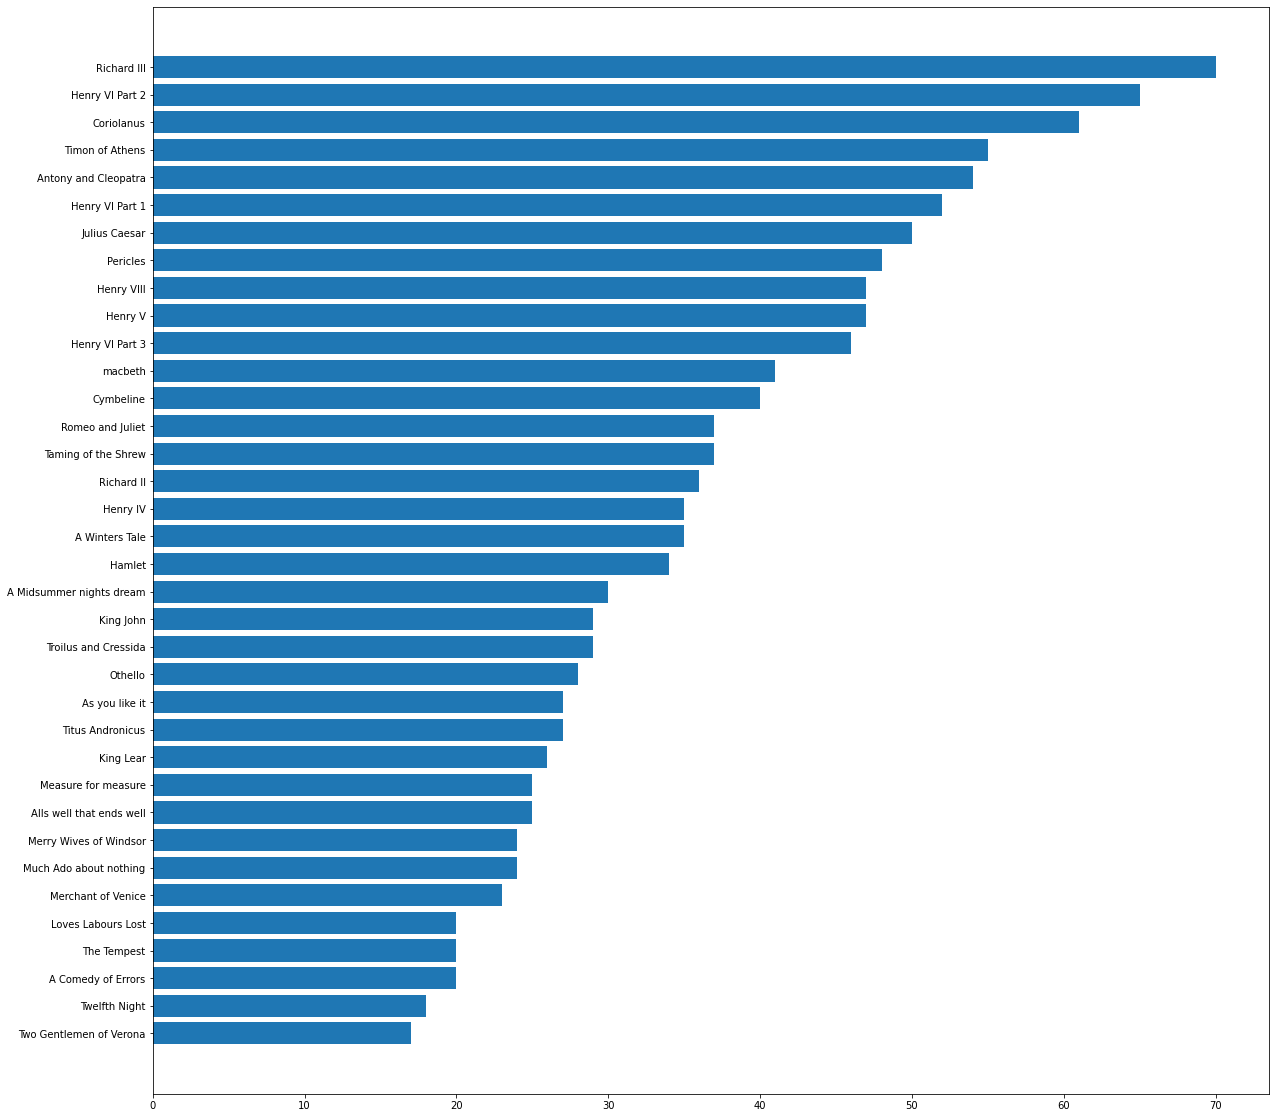

In [3]:
Players_num=plays_df.groupby(["Play"])['Player'].nunique().sort_values(ascending=True).to_frame()   #groups the dataset by plays, counts the unique players, and sorts low to high 
Players_num['Play']=Players_num.index.tolist()                                                      #converts the Play index to a list
Players_num.columns=['Number_of_Players','Play']                                                    #Assigns column titles
Players_num.index=np.arange(0,len(Players_num))                                                     #reindexes the Player_numbers  



plt.figure(figsize=(20,20))
ax = plt.barh(width='Number_of_Players',y='Play',data=Players_num)
#ax.set_xlabel('Number_of_Players')
#ax.set_title('Number of Players in individual Shakespear Plays')

Since we are using text as a feature we need to do something to get it into a form that can be used to classify. One way to do this is to create feature vectors from Sikitlearn. Section 6.2.3 of Sklearns documentation talks about ways to extract features from text. A mathmatical representation of the text is required to be fed to an algorithm. Since there is a signifigant amount of text some words like a, is, the... carry no important information and can be reweighed using a TFID term weighting. Basicaly it multiplies the term frequency by the inverse term frequency making common words less valuable and uncommon words more valuable. 

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
#create a dictionary of players and convert it to lables 
players=plays_df.Player.unique()                                                #returns the unique players in the dataset
Player_Lables=dict()
i=0
for player in players:
  Player_Lables[player]=i
  i=i+1

LP_plays_df = plays_df.replace({"Player": Player_Lables})                       #replaces the players in the dataframe with their player lables 
TFIDF=TfidfVectorizer(sublinear_tf=True, min_df=5, encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features=TFIDF.fit_transform(LP_plays_df.PlayerLine).toarray()                  # fits and transforms the player lines to ther is zero mean
features.shape



(105153, 10568)

Now that we have done the vectorization and fitting we can seperate the data into a traning and testing dataset

In [8]:
LP_plays_df=LP_plays_df.dropna()                                                #drops all the scene changes and other NaN in the dataframe


x_train, x_test, y_train, y_test = train_test_split(LP_plays_df.PlayerLine, LP_plays_df.Player, random_state=1) # Player line is the data we want and player is the classification 


# Classification Techniques


*   Naive Byes 
*   Random Forest
*   Logistic Regression
*   Support Vector Machine





Multinominal Niave Byes is one of two different ways to classify word data in the form of word vector counts or in this case tf-idf vectors We assume here that the dataset is balanced. However this may not be the case.




In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


count_vector=CountVectorizer()
x_train_count=count_vector.fit_transform(x_train)
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_count)



Running the training file 

In [20]:
clf=MultinomialNB().fit(x_train_tfidf, y_train)

Running on the Testing file

In [21]:
clf.score(count_vector.transform(X_test), y_test)

0.03282741831184145

We can see that using a different NB meant for the unbalanced datasets that he have a higher accuracy. 

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import ComplementNB


count_vector=CountVectorizer()
x_train_count=count_vector.fit_transform(x_train)
tfidf_transformer=TfidfTransformer()
x_train_tfidf=tfidf_transformer.fit_transform(x_train_count)



Running the training file 

In [15]:
clf=ComplementNB().fit(x_train_tfidf, y_train)

Running on the Testing file

In [16]:
clf.score(count_vector.transform(X_test), y_test)

0.07421354939328235